In [17]:
!pip install pgmpy


In [28]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from google.colab import files
from pgmpy.models import DiscreteBayesianNetwork
import matplotlib.pyplot as plt
import networkx as nx

In [19]:
# Step 2: Load Dataset from Local Runtime

uploaded = files.upload()
df = pd.read_csv('heart_disease.csv')
df.head()


Saving heart_disease.csv to heart_disease (1).csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Step 3: Data Cleaning - Remove Duplicates and Missing Values
print("Original shape:", df.shape)
df = df.drop_duplicates()
df = df.dropna()
print("Shape after cleaning:", df.shape)
df.head()


Original shape: (303, 14)
Shape after cleaning: (302, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Step 4: Apply Min-Max Normalization to Numeric Columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize using min-max scaling
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [22]:
# Step 5: Define Bayesian Network Structure and Train Model (Updated for latest pgmpy)
model = DiscreteBayesianNetwork([
    ('age', 'fbs'),
    ('fbs', 'target'),
    ('target', 'chol'),
    ('target', 'thalach')
])

model.fit(df, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)


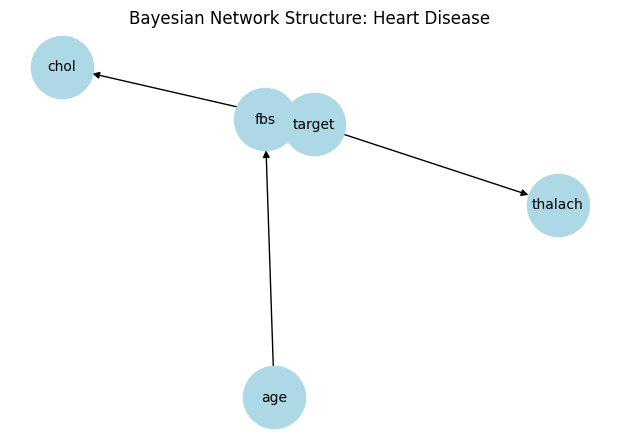

In [23]:


# Step 6: Visualize Bayesian Network (compatible with latest pgmpy)
G = nx.DiGraph()
G.add_edges_from(model.edges)

plt.figure(figsize=(6,4))
pos = nx.spring_layout(G, seed=42)  # Layout can be adjusted as needed
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, arrows=True)
plt.title("Bayesian Network Structure: Heart Disease")
plt.show()


In [24]:
# Step 7: Inference - Probability of Heart Disease given normalized age = 0.5
q1 = infer.query(variables=['target'], evidence={'age': 0.5})
print("Probability of Heart Disease given normalized age = 0.5:")
print(q1)


Probability of Heart Disease given normalized age = 0.5:
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.4654 |
+-------------+---------------+
| target(1.0) |        0.5346 |
+-------------+---------------+


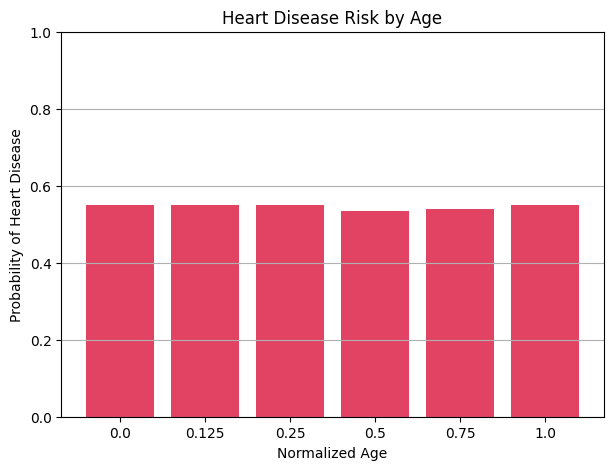

In [27]:
# Step 8: Inference - Plot Heart Disease Probability vs Valid Age States

age_vals = [0.0, 0.125, 0.25, 0.5, 0.75, 1.0]  # These must exist in the printed list above
probs = []

for age in age_vals:
    q = infer.query(variables=['target'], evidence={'age': age})
    probs.append(q.values[1])  # target=1 => disease present

# Plotting
plt.figure(figsize=(7,5))
plt.bar([str(a) for a in age_vals], probs, color='crimson', alpha=0.8)
plt.xlabel("Normalized Age")
plt.ylabel("Probability of Heart Disease")
plt.title("Heart Disease Risk by Age")
plt.grid(axis='y')
plt.ylim(0, 1)
plt.show()
